# Figure for paper: visualize the distribution of the PV definitions

In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from loader import *
import logging
from utils import *

logging.disable(logging.CRITICAL) #disable the logging

### Set up the data and model

In [3]:
data_path = 'data-files/'
nbrSeeds = 10

filename = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s3"
filename_metadata = filename + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["idx species removed"]
model = loader.loadModel()
id_model = loader.metadata["Training_id"]
output_idx = loader.metadata["output species idx"]
idx_species_removed = loader.metadata["idx species removed"]
input_scaling = loader.metadata["input scaling"]
input_species_scaling = loader.metadata["input species scaling"]
input_species_bias = loader.metadata["input species bias"]
range_mf  = loader.metadata["range_mf"]

## DNS: multiple seeds

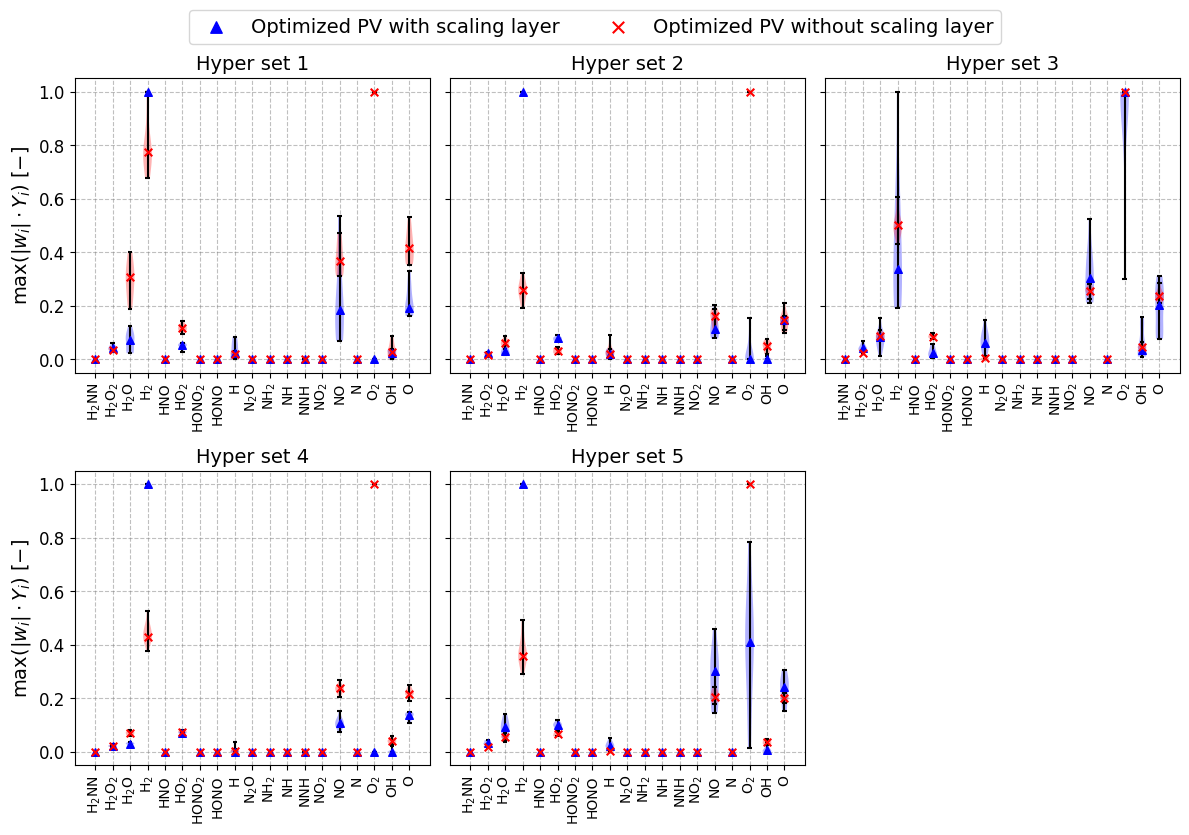

In [ ]:
dataset = "flamelet"  #"flamelet" "low"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Weights/{'DNS' if dataset == 'low' else dataset}/"
name = f"weights max(wiYi) - Optimized PV with and without scaling layer - all hyperset - all model - {'DNS' if dataset == 'low' else dataset} - seeds with title - invColor.png"
namePdf = f"weights max(wiYi) - Optimized PV with and without scaling layer - all hyperset - all model - {'DNS' if dataset == 'low' else dataset} - seeds with title - invColor.pdf"

abs = True #in absolute value otherwise jumps from -1 to 1/sign flips for the different species

path_state = path_data + f"Xu-state-space-{dataset}.csv"

#get index spcies removed
my_species_Xu = Species(path_data)

list_species_Xu = my_species_Xu.get_list_species()
for index in sorted(idx_species_removed, reverse=True): #same species to remove
    list_species_Xu.pop(index)

final_weights_Xu = np.zeros(19)
final_weights_Xu[list_species_Xu.index("H2O")] = 1
final_weights_Xu[list_species_Xu.index("H2")] = -1
final_weights_Xu[list_species_Xu.index("O2")] = -1

#get mass fractions of species
headerDataset = None if dataset == "low" else "infer"
state_space_Xu = read_csv(path_state, header = headerDataset)
state_space_Xu = state_space_Xu.drop(state_space_Xu.columns[idx_species_removed], axis=1)
state_space_matrix_Xu = state_space_Xu.to_numpy()

wi_Yi_Xu = state_space_matrix_Xu*np.abs(final_weights_Xu) #|w_i|*Y_i
if(abs):
    max_wi_Yi_Xu = np.max(wi_Yi_Xu, axis = 0) #take max of every species
else:
    max_wi_Yi_Xu = np.sign(final_weights_Xu)*np.max(wi_Yi_Xu, axis = 0) #take max of every species

max_wi_Yi_scaled_Xu = max_wi_Yi_Xu/np.max(np.abs(max_wi_Yi_Xu))

weightsSpecies = np.zeros((nbrSeeds, len(final_weights_Xu)))
weightsSpeciesWithoutScaling = np.zeros((nbrSeeds, len(final_weights_Xu)))

namesWithout = ["Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Feb2025-hour_18h31_Tr35aW_s",
                "Xu-AE-opt_RMSprop-epo_100000-lr_0.001-date_21Nov2024-hour_15h41_Tr32k_s",
                "Xu-AE-opt_RMSprop-epo_100000-lr_0.01-date_20Feb2025-hour_19h27_Tr35abW_s",
                "Xu-AE-opt_RMSprop-epo_100000-lr_0.0075-date_21Feb2025-hour_17h37_Tr32tFullW_s",
                "Xu-AE-opt_RMSprop-epo_100000-lr_0.005-date_24Feb2025-hour_15h32_Tr35acW_s"]


namesWith = ["Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s",
             "Xu-AE-opt_RMSprop-epo_100000-lr_0.0075-date_27Nov2024-hour_21h39_Tr32tscaleFull_s",
             "Xu-AE-opt_RMSprop-epo_100000-lr_0.001-date_16Jan2025-hour_17h33_Tr33b_s",
             "Xu-AE-opt_RMSprop-epo_100000-lr_0.01-date_20Feb2025-hour_19h30_Tr35ab_s",
             "Xu-AE-opt_RMSprop-epo_100000-lr_0.005-date_24Feb2025-hour_15h31_Tr35ac_s"
             ]

rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()

for idxHyperset, (modelWithout, modelWith) in enumerate(zip(namesWithout, namesWith)):

    for idxSeed in range(nbrSeeds):

        ###################
        #With scaling layer
        ###################

        filename = f"{modelWith}{idxSeed}"
        filename_metadata = filename + "_metadata.pkl"
        path_metadata = "metadata/"
        filename_species_names = "Xu-state-space-names.csv"
        path_data = "data-files/"

        loader = loadData(filename_species_names, path_metadata, filename_metadata)
        idx_species_removed = loader.metadata["idx species removed"]
        model = loader.loadModel()
        id_model = loader.metadata["Training_id"]
        output_idx = loader.metadata["output species idx"]
        idx_species_removed = loader.metadata["idx species removed"]
        input_scaling = loader.metadata["input scaling"]
        input_species_scaling = loader.metadata["input species scaling"]
        input_species_bias = loader.metadata["input species bias"]
        range_mf  = loader.metadata["range_mf"]

        final_weights = model.get_total_encoder_weights(npy = True)[0]

        #get index spcies removed
        my_species = Species(path_data)

        list_species = my_species.get_list_species()
        for index in sorted(idx_species_removed, reverse=True):
            list_species.pop(index)

        #get mass fractions of species
        state_space = read_csv(path_state, header = "infer")
        state_space = state_space.drop(state_space.columns[idx_species_removed], axis=1)
        state_space_matrix = state_space.to_numpy()

        wi_Yi = state_space_matrix*np.abs(final_weights) #|w_i|*Y_i
        if(abs):
            max_wi_Yi = np.max(wi_Yi, axis = 0) #take max of every species
        else:
            max_wi_Yi = np.sign(final_weights)*np.max(wi_Yi, axis = 0) #take max of every species

        max_wi_Yi_scaled = max_wi_Yi/np.max(np.abs(max_wi_Yi))

        weightsSpecies[idxSeed, :] = max_wi_Yi_scaled


        ######################
        #Without scaling layer
        ######################

        filename = f"{modelWithout}{idxSeed}"
        filename_metadata = filename + "_metadata.pkl"
        path_metadata = "metadata/"
        filename_species_names = "Xu-state-space-names.csv"
        path_data = "data-files/"

        loader = loadData(filename_species_names, path_metadata, filename_metadata)
        idx_species_removed = loader.metadata["idx species removed"]
        model = loader.loadModel()
        id_modelW = loader.metadata["Training_id"]
        output_idx = loader.metadata["output species idx"]
        idx_species_removed = loader.metadata["idx species removed"]
        input_scaling = loader.metadata["input scaling"]
        input_species_scaling = loader.metadata["input species scaling"]
        input_species_bias = loader.metadata["input species bias"]
        range_mf  = loader.metadata["range_mf"]

        final_weights = model.get_total_encoder_weights(npy = True)[0]

        #get index spcies removed
        my_species = Species(path_data)

        list_species = my_species.get_list_species()
        for index in sorted(idx_species_removed, reverse=True):
            list_species.pop(index)

        #get mass fractions of species
        state_space = read_csv(path_state, header = "infer")
        state_space = state_space.drop(state_space.columns[idx_species_removed], axis=1)
        state_space_matrix = state_space.to_numpy()

        wi_Yi = state_space_matrix*np.abs(final_weights) #|w_i|*Y_i
        if(abs):
            max_wi_Yi = np.max(wi_Yi, axis = 0) #take max of every species
        else:
            max_wi_Yi = np.sign(final_weights)*np.max(wi_Yi, axis = 0) #take max of every species

        max_wi_Yi_scaled = max_wi_Yi/np.max(np.abs(max_wi_Yi))

        weightsSpeciesWithoutScaling[idxSeed, :] = max_wi_Yi_scaled


    #################
    #Plot the weights
    #################

    latex_species_list = [s.replace('2', r'$_2$').replace('3', r'$_3$') for s in list_species]

    # Show only the heuristic marks where it is different from zero
    non_zero_mask = max_wi_Yi_scaled_Xu != 0

    positions = np.arange(len(max_wi_Yi_scaled))

    ax = axs[idxHyperset]  # Use subplot axis

    # With scaling layer
    violin = ax.violinplot(weightsSpecies, positions)
    for element in violin["bodies"]:
        element.set_facecolor("blue")
        element.set_linewidth(10)
    violin['cmins'].set_color('black')
    violin['cmaxes'].set_color('black')
    violin['cbars'].set_color('black')
    medians = np.median(weightsSpecies, axis=0)
    ax.scatter(positions, medians, color='blue', marker='^', s=30, zorder=3, label='Optimized PV with scaling layer')

    # Without scaling layer
    violinW = ax.violinplot(weightsSpeciesWithoutScaling, positions)
    for element in violinW["bodies"]:
        element.set_facecolor("red")
        element.set_linewidth(10)
    violinW['cmins'].set_color('black')
    violinW['cmaxes'].set_color('black')
    violinW['cbars'].set_color('black')
    medians = np.median(weightsSpeciesWithoutScaling, axis=0)
    ax.scatter(positions, medians, color='red', marker='x', s=30, zorder=3, label='Optimized PV without scaling layer')

    if idxHyperset == 0:
        handles, labels = ax.get_legend_handles_labels()

    if(idxHyperset % cols == 0):
        if abs:
            ax.set_ylabel(r"max($|w_i| \cdot Y_i$) [$-$]", fontsize=14)
        else:
            ax.set_ylabel(r"max($w_i \cdot Y_i$) [$-$]", fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
    else:
        ax.tick_params(axis='y', labelleft=False)

    ax.set_xticks(np.arange(len(max_wi_Yi_scaled)))
    ax.set_xticklabels(latex_species_list, fontsize=10, rotation=90)
    ax.grid(True, linestyle='--', color='gray', alpha=0.5)
    ax.set_title(f"Hyper set {idxHyperset + 1}", fontsize=14)

# Hide the sixth subplot (empty)
axs[5].axis('off')

# Create the legend in the specified location
fig.legend(handles, labels, fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, scatterpoints=1, markerscale=1.5)

plt.tight_layout()
if save:
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')
    plt.savefig(pathSave + namePdf, bbox_inches='tight')
plt.show()

## Autoignition

### With and without scaling layer

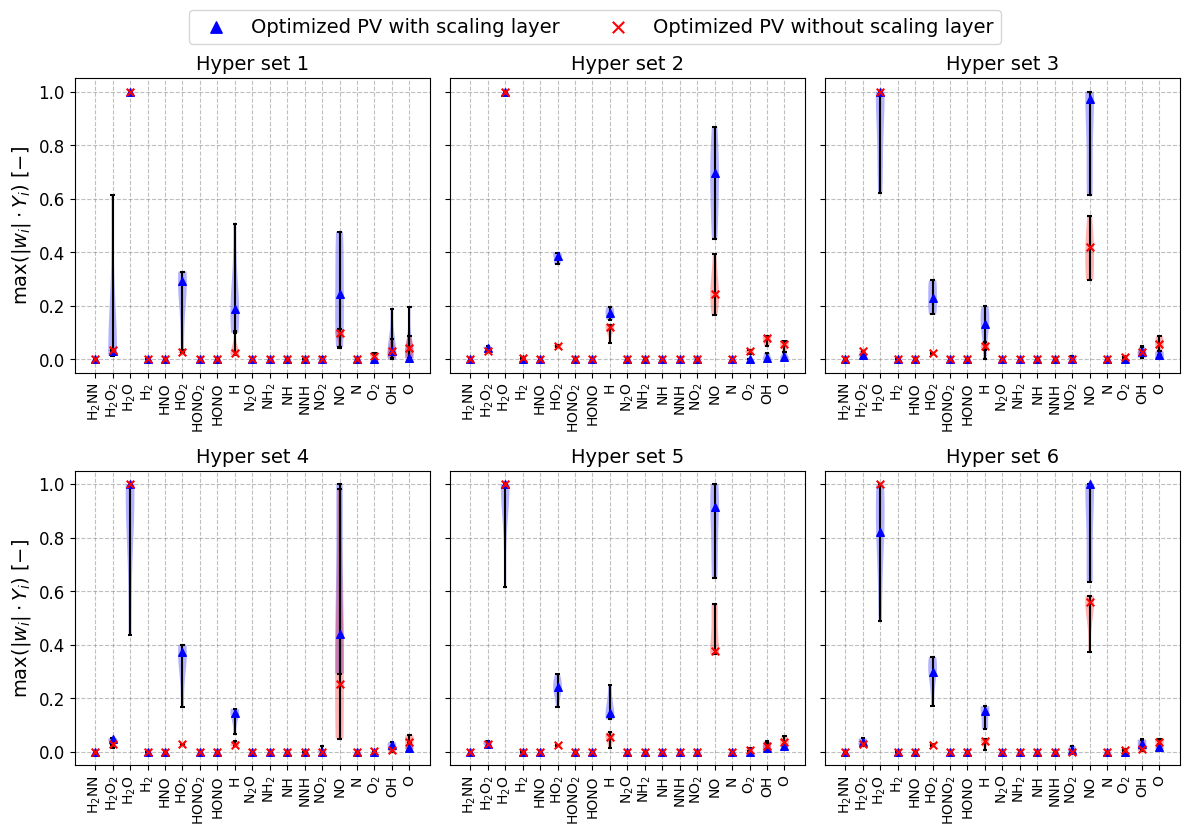

In [ ]:
dataset = "autoignition"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Weights/{'DNS' if dataset == 'low' else dataset}/"

abs = True #in absolute value otherwise jumps from -1 to 1/sign flips for the different species

path_state = path_data + f"Xu-state-space-{dataset}.csv"
nbrSeeds = 5


weightsSpecies = np.zeros((nbrSeeds, len(final_weights_Xu)))
weightsSpeciesWithoutScaling = np.zeros((nbrSeeds, len(final_weights_Xu)))

namesWithout = ["Xu-AE-opt_adam-epo_100000-lr_0.025-date_23Mar2025-hour_11h00_Tr0D-2pW_s",
                "Xu-AE-opt_adam-epo_100000-lr_0.025-date_22Mar2025-hour_23h09_Tr0D-2qW_s",
                "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h55_Tr0D-2rW_s",
                "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h57_Tr0D-2sW_s",
                "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h52_Tr0D-2tW_s",
                "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h54_Tr0D-2uW_s"]

namesWith = ["Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h22_Tr0D-2p_s",
             "Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s",
             "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_10h41_Tr0D-2r_s",
             "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_10h50_Tr0D-2s_s",
             "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_11h18_Tr0D-2t_s",
             "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_11h16_Tr0D-2u_s"]

#get index spcies removed
my_species_Xu = Species(path_data)

list_species_Xu = my_species_Xu.get_list_species()
for index in sorted(idx_species_removed, reverse=True): #same species to remove
    list_species_Xu.pop(index)

final_weights_Xu = np.zeros(19)
final_weights_Xu[list_species_Xu.index("H2O")] = 1
final_weights_Xu[list_species_Xu.index("H2")] = -1
final_weights_Xu[list_species_Xu.index("O2")] = -1

#get mass fractions of species
state_space_Xu = read_csv(path_state, header = "infer")
state_space_Xu = state_space_Xu.drop(state_space_Xu.columns[idx_species_removed], axis=1)
state_space_matrix_Xu = state_space_Xu.to_numpy()

wi_Yi_Xu = state_space_matrix_Xu*np.abs(final_weights_Xu) #|w_i|*Y_i
if(abs):
    max_wi_Yi_Xu = np.max(wi_Yi_Xu, axis = 0) #take max of every species
else:
    max_wi_Yi_Xu = np.sign(final_weights_Xu)*np.max(wi_Yi_Xu, axis = 0) #take max of every species

max_wi_Yi_scaled_Xu = max_wi_Yi_Xu/np.max(np.abs(max_wi_Yi_Xu))

rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()


for idxHyperset, (modelWithout, modelWith) in enumerate(zip(namesWithout, namesWith)):

    for idxSeed in range(nbrSeeds):

        ###################
        #With scaling layer
        ###################

        filename_model = f"{modelWith}{idxSeed}"
        filename_metadata_0D = filename_model + "_metadata.pkl"

        loader_0D = loadData(filename_species_names, path_metadata, filename_metadata_0D)
        output_idx = loader_0D.metadata["list idx species removed source"] if loader_0D.metadata["dataset_type"].startswith("autoignition_augm") else loader_0D.metadata["idx species removed"]
        idx_species_removed = loader_0D.metadata["list idx species removed source"] if loader_0D.metadata["dataset_type"].startswith("autoignition_augm") else loader_0D.metadata["idx species removed"]
        input_scaling = loader_0D.metadata["input scaling"]
        input_species_scaling = loader_0D.metadata["input species scaling"]
        input_species_bias = loader_0D.metadata["input species bias"]
        range_mf  = loader_0D.metadata["range_mf"]
        depvar_names_species = loader_0D.metadata["list species output"]
        depvar_names_idx = loader_0D.metadata["output elements"]
        PV_dim = loader_0D.metadata["PV dim"]
        depvar_names = depvar_names_species + depvar_names_idx[-(PV_dim+1):]
        model_0D = loader_0D.loadModel()
        id = loader_0D.metadata["Training_id"]
        nbr_input_species = loader_0D.metadata["nbr input species"]


        ###################
        #With scaling layer
        ###################

        final_weights = model_0D.get_total_encoder_weights(npy = True)[0]

        #get index spcies removed
        my_species = Species(path_data)

        list_species = my_species.get_list_species()
        for index in sorted(idx_species_removed, reverse=True):
            list_species.pop(index)

        #get mass fractions of species
        state_space = read_csv(path_state, header = "infer")
        state_space = state_space.drop(state_space.columns[idx_species_removed], axis=1)
        state_space_matrix = state_space.to_numpy()

        wi_Yi = state_space_matrix*np.abs(final_weights) #|w_i|*Y_i
        if(abs):
            max_wi_Yi = np.max(wi_Yi, axis = 0) #take max of every species
        else:
            max_wi_Yi = np.sign(final_weights)*np.max(wi_Yi, axis = 0) #take max of every species

        max_wi_Yi_scaled = max_wi_Yi/np.max(np.abs(max_wi_Yi))

        weightsSpecies[idxSeed, :] = max_wi_Yi_scaled




        ######################
        #Without scaling layer
        ######################

        filename_model = f"{modelWithout}{idxSeed}"
        filename_metadata_0D = filename_model + "_metadata.pkl"

        loader_0D = loadData(filename_species_names, path_metadata, filename_metadata_0D)
        output_idx = loader_0D.metadata["list idx species removed source"] if loader_0D.metadata["dataset_type"].startswith("autoignition_augm") else loader_0D.metadata["idx species removed"]
        idx_species_removed = loader_0D.metadata["list idx species removed source"] if loader_0D.metadata["dataset_type"].startswith("autoignition_augm") else loader_0D.metadata["idx species removed"]
        input_scaling = loader_0D.metadata["input scaling"]
        input_species_scaling = loader_0D.metadata["input species scaling"]
        input_species_bias = loader_0D.metadata["input species bias"]
        range_mf  = loader_0D.metadata["range_mf"]
        depvar_names_species = loader_0D.metadata["list species output"]
        depvar_names_idx = loader_0D.metadata["output elements"]
        PV_dim = loader_0D.metadata["PV dim"]
        depvar_names = depvar_names_species + depvar_names_idx[-(PV_dim+1):]
        model_0D = loader_0D.loadModel()
        id = loader_0D.metadata["Training_id"]
        nbr_input_species = loader_0D.metadata["nbr input species"]


        ###################
        #With scaling layer
        ###################

        final_weights = model_0D.get_total_encoder_weights(npy = True)[0]

        #get index spcies removed
        my_species = Species(path_data)

        list_species = my_species.get_list_species()
        for index in sorted(idx_species_removed, reverse=True):
            list_species.pop(index)

        #get mass fractions of species
        state_space = read_csv(path_state, header = "infer")
        state_space = state_space.drop(state_space.columns[idx_species_removed], axis=1)
        state_space_matrix = state_space.to_numpy()

        wi_Yi = state_space_matrix*np.abs(final_weights) #|w_i|*Y_i
        if(abs):
            max_wi_Yi = np.max(wi_Yi, axis = 0) #take max of every species
        else:
            max_wi_Yi = np.sign(final_weights)*np.max(wi_Yi, axis = 0) #take max of every species

        max_wi_Yi_scaled = max_wi_Yi/np.max(np.abs(max_wi_Yi))

        weightsSpeciesWithoutScaling[idxSeed, :] = max_wi_Yi_scaled

        name = f"weights max(wiYi) - Optimized PV with and without scaling layer - all hyperset - all models - {'DNS' if dataset == 'low' else dataset} - seeds with title - invColor.png"
        namePdf = f"weights max(wiYi) - Optimized PV with and without scaling layer - all hyperset - all models - {'DNS' if dataset == 'low' else dataset} - seeds with title - invColor.pdf"

    #################
    #Plot the weights
    #################

    ax = axs[idxHyperset]  # Use subplot axis

    latex_species_list = [s.replace('2', r'$_2$').replace('3', r'$_3$') for s in list_species]
    non_zero_mask = max_wi_Yi_scaled_Xu != 0
    positions = np.arange(len(max_wi_Yi_scaled))

    # With scaling layer
    violin = ax.violinplot(weightsSpecies, positions)
    for element in violin["bodies"]:
        element.set_facecolor("blue")
        element.set_linewidth(10)
    violin['cmins'].set_color('black')
    violin['cmaxes'].set_color('black')
    violin['cbars'].set_color('black')
    medians = np.median(weightsSpecies, axis=0)
    ax.scatter(positions, medians, color='blue', marker='^', s=30, zorder=3, label='Optimized PV with scaling layer')

    # Without scaling layer
    violinW = ax.violinplot(weightsSpeciesWithoutScaling, positions)
    for element in violinW["bodies"]:
        element.set_facecolor("red")
        element.set_linewidth(10)
    violinW['cmins'].set_color('black')
    violinW['cmaxes'].set_color('black')
    violinW['cbars'].set_color('black')
    medians = np.median(weightsSpeciesWithoutScaling, axis=0)
    ax.scatter(positions, medians, color='red', marker='x', s=30, zorder=3, label='Optimized PV without scaling layer')

    if idxHyperset == 0:
        handles, labels = ax.get_legend_handles_labels()

    if(idxHyperset%cols == 0):
        if abs:
            ax.set_ylabel(r"max($|w_i| \cdot Y_i$) [$-$]", fontsize=14)
        else:
            ax.set_ylabel(r"max($w_i \cdot Y_i$) [$-$]", fontsize=14)
        ax.tick_params(axis='y', labelsize=12)
    else:
        ax.tick_params(axis='y', labelleft=False)

    ax.set_xticks(np.arange(len(max_wi_Yi_scaled)))
    ax.set_xticklabels(latex_species_list, fontsize=10, rotation=90)
    ax.grid(True, linestyle='--', color='gray', alpha=0.5)
    ax.set_title(f"Hyper set {idxHyperset+1}", fontsize=14)

fig.legend(handles, labels, fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, scatterpoints=1, markerscale=1.5)

plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')
    plt.savefig(pathSave + namePdf, bbox_inches='tight')
plt.show()

### Effect of QoI

With the heuristic PV added

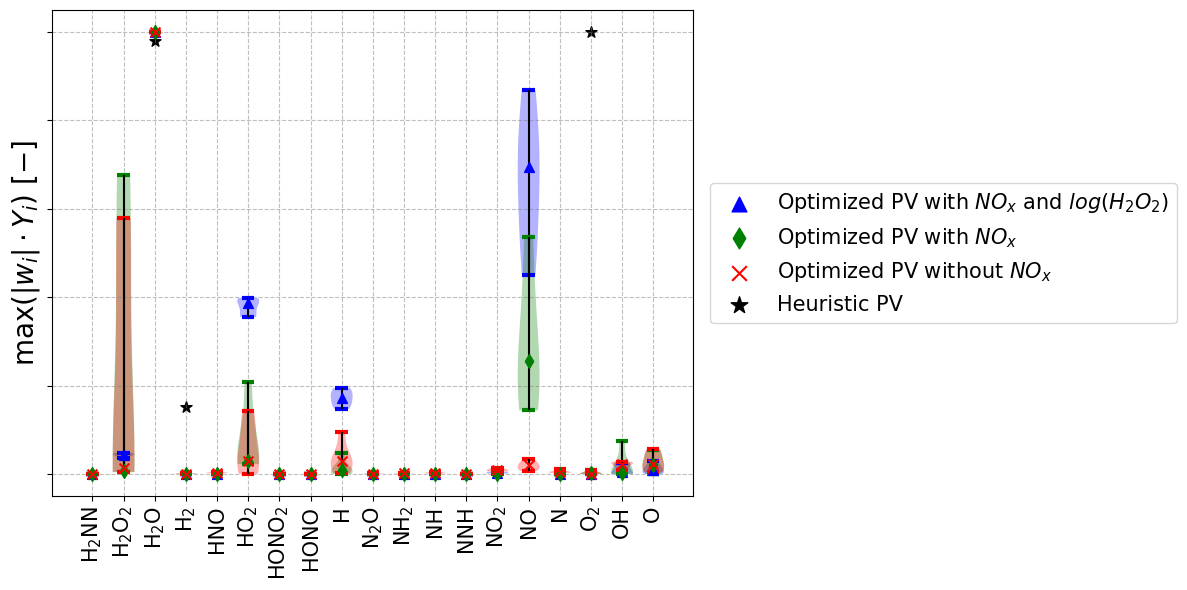

In [12]:
dataset = "autoignition"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Weights/"
name = "weights - effect of QoI - autoignition - with heuristic.png"
namePdf = "weights - effect of QoI - autoignition - with heuristic.pdf"

abs = True #in absolute value otherwise jumps from -1 to 1/sign flips for the different species

path_state = path_data + f"Xu-state-space-{dataset}.csv"
nbrSeeds = 5


weightsSpecies = np.zeros((nbrSeeds, len(final_weights_Xu)))
weightsSpeciesWithNOx = np.zeros((nbrSeeds, len(final_weights_Xu)))
weightsSpeciesWithoutNOx = np.zeros((nbrSeeds, len(final_weights_Xu)))


nameModels = ["Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s",
              "Xu-AE-opt_adam-epo_100000-lr_0.025-date_18Feb2025-hour_22h58_Tr0D-2h_s",              
              "Xu-AE-opt_adam-epo_100000-lr_0.025-date_15Apr2025-hour_15h37_Tr0D-2v_s"]

########################
# Heuristic PV

my_species_Xu = Species(path_data)

list_species_Xu = my_species_Xu.get_list_species()
for index in sorted(idx_species_removed, reverse=True): #same species to remove
    list_species_Xu.pop(index)

final_weights_Xu = np.zeros(19)
final_weights_Xu[list_species_Xu.index("H2O")] = 1
final_weights_Xu[list_species_Xu.index("H2")] = -1
final_weights_Xu[list_species_Xu.index("O2")] = -1

#get mass fractions of species
state_space_Xu = read_csv(path_state, header = "infer")
state_space_Xu = state_space_Xu.drop(state_space_Xu.columns[idx_species_removed], axis=1)
state_space_matrix_Xu = state_space_Xu.to_numpy()

wi_Yi_Xu = state_space_matrix_Xu*np.abs(final_weights_Xu) #|w_i|*Y_i
if(abs):
    max_wi_Yi_Xu = np.max(wi_Yi_Xu, axis = 0) #take max of every species
else:
    max_wi_Yi_Xu = np.sign(final_weights_Xu)*np.max(wi_Yi_Xu, axis = 0) #take max of every species

max_wi_Yi_scaled_Xu = max_wi_Yi_Xu/np.max(np.abs(max_wi_Yi_Xu))

#########################
# Start Figure

fig = plt.figure(figsize=(12, 6))
                 
for idxSeed in range(nbrSeeds):

    for idxModel, modelName in enumerate(nameModels):

        filename_model = f"{modelName}{idxSeed}"
        filename_metadata_0D = filename_model + "_metadata.pkl"

        loader_0D = loadData(filename_species_names, path_metadata, filename_metadata_0D)
        output_idx = loader_0D.metadata["list idx species removed source"] if loader_0D.metadata["dataset_type"].startswith("autoignition_augm") else loader_0D.metadata["idx species removed"]
        idx_species_removed = loader_0D.metadata["list idx species removed source"] if loader_0D.metadata["dataset_type"].startswith("autoignition_augm") else loader_0D.metadata["idx species removed"]
        input_scaling = loader_0D.metadata["input scaling"]
        input_species_scaling = loader_0D.metadata["input species scaling"]
        input_species_bias = loader_0D.metadata["input species bias"]
        range_mf  = loader_0D.metadata["range_mf"]
        depvar_names_species = loader_0D.metadata["list species output"]
        depvar_names_idx = loader_0D.metadata["output elements"]
        PV_dim = loader_0D.metadata["PV dim"]
        depvar_names = depvar_names_species + depvar_names_idx[-(PV_dim+1):]
        model_0D = loader_0D.loadModel()
        id = loader_0D.metadata["Training_id"]
        nbr_input_species = loader_0D.metadata["nbr input species"]

        final_weights = model_0D.get_total_encoder_weights(npy = True)[0]

        #get index spcies removed
        my_species = Species(path_data)

        list_species = my_species.get_list_species()
        for index in sorted(idx_species_removed, reverse=True):
            list_species.pop(index)

        #get mass fractions of species
        state_space = read_csv(path_state, header = "infer")
        state_space = state_space.drop(state_space.columns[idx_species_removed], axis=1)
        state_space_matrix = state_space.to_numpy()

        wi_Yi = state_space_matrix*np.abs(final_weights) #|w_i|*Y_i
        if(abs):
            max_wi_Yi = np.max(wi_Yi, axis = 0) #take max of every species
        else:
            max_wi_Yi = np.sign(final_weights)*np.max(wi_Yi, axis = 0) #take max of every species

        max_wi_Yi_scaled = max_wi_Yi/np.max(np.abs(max_wi_Yi))

        if(idxModel == 0):
            weightsSpecies[idxSeed, :] = max_wi_Yi_scaled
        elif(idxModel == 1):
            weightsSpeciesWithNOx[idxSeed, :] = max_wi_Yi_scaled
        else:
            weightsSpeciesWithoutNOx[idxSeed, :] = max_wi_Yi_scaled


#################
#Plot the weights
#################

latex_species_list = [s.replace('2', r'$_2$').replace('3', r'$_3$') for s in list_species]
non_zero_mask = max_wi_Yi_scaled_Xu != 0
positions = np.arange(len(max_wi_Yi_scaled))

# With NOx and log(H2O2)
violin = plt.violinplot(weightsSpecies, positions, widths = 0.7)
for element in violin["bodies"]:
    element.set_facecolor("blue")
    element.set_linewidth(10)
violin['cmins'].set_color('blue')
violin['cmaxes'].set_color('blue')
violin['cbars'].set_color('black')
medians = np.median(weightsSpecies, axis=0)

violin['cmaxes'].set_linewidth(3)
violin['cmins'].set_linewidth(3)

for i, (cmin, cmax) in enumerate(zip(violin['cmins'].get_segments(), violin['cmaxes'].get_segments())):
    # Extract y-values (vertical limits)
    y_min = cmin[0][1]
    y_max = cmax[0][1]

    # Use actual position
    x_center = positions[i]
    width = 0.2  # desired width of the extrema bars

    # Set new segments for min and max bars
    violin['cmins'].set_segments([
        [[x_center - width, seg[0][1]], [x_center + width, seg[0][1]]]
        for seg, x_center in zip(violin['cmins'].get_segments(), positions)
    ])
    violin['cmaxes'].set_segments([
        [[x_center - width, seg[0][1]], [x_center + width, seg[0][1]]]
        for seg, x_center in zip(violin['cmaxes'].get_segments(), positions)
    ])
plt.scatter(positions, medians, color='blue', marker='^', s=50, zorder=3, label='Optimized PV with $NO_x$ and $log(H_2O_2)$')

# With NOx
violinWith = plt.violinplot(weightsSpeciesWithNOx, positions, widths = 0.7)
for element in violinWith["bodies"]:
    element.set_facecolor("green")
    element.set_linewidth(10)
violinWith['cmins'].set_color('green')
violinWith['cmaxes'].set_color('green')
violinWith['cbars'].set_color('black')
medians = np.median(weightsSpeciesWithNOx, axis=0)

violinWith['cmaxes'].set_linewidth(3)
violinWith['cmins'].set_linewidth(3)

for i, (cmin, cmax) in enumerate(zip(violinWith['cmins'].get_segments(), violin['cmaxes'].get_segments())):
    # Extract y-values (vertical limits)
    y_min = cmin[0][1]
    y_max = cmax[0][1]

    # Use actual position
    x_center = positions[i]
    width = 0.2  # desired width of the extrema bars

    # Set new segments for min and max bars
    violinWith['cmins'].set_segments([
        [[x_center - width, seg[0][1]], [x_center + width, seg[0][1]]]
        for seg, x_center in zip(violinWith['cmins'].get_segments(), positions)
    ])
    violinWith['cmaxes'].set_segments([
        [[x_center - width, seg[0][1]], [x_center + width, seg[0][1]]]
        for seg, x_center in zip(violinWith['cmaxes'].get_segments(), positions)
    ])

plt.scatter(positions, medians, color='green', marker='d', s=50, zorder=3, label='Optimized PV with $NO_x$')

# Without NOx
violinWithout = plt.violinplot(weightsSpeciesWithoutNOx, positions, widths = 0.7)
for element in violinWithout["bodies"]:
    element.set_facecolor("red")
    element.set_linewidth(10)
violinWithout['cmins'].set_color('red')
violinWithout['cmaxes'].set_color('red')
violinWithout['cbars'].set_color('black')
medians = np.median(weightsSpeciesWithoutNOx, axis=0)

violinWithout['cmaxes'].set_linewidth(3)
violinWithout['cmins'].set_linewidth(3)

for i, (cmin, cmax) in enumerate(zip(violinWithout['cmins'].get_segments(), violin['cmaxes'].get_segments())):
    # Extract y-values (vertical limits)
    y_min = cmin[0][1]
    y_max = cmax[0][1]

    # Use actual position
    x_center = positions[i]
    width = 0.2  # desired width of the extrema bars

    # Set new segments for min and max bars
    violinWithout['cmins'].set_segments([
        [[x_center - width, seg[0][1]], [x_center + width, seg[0][1]]]
        for seg, x_center in zip(violinWithout['cmins'].get_segments(), positions)
    ])
    violinWithout['cmaxes'].set_segments([
        [[x_center - width, seg[0][1]], [x_center + width, seg[0][1]]]
        for seg, x_center in zip(violinWithout['cmaxes'].get_segments(), positions)
    ])


plt.scatter(positions, medians, color='red', marker='x', s=50, zorder=3, label='Optimized PV without $NO_x$')

# Heuristic PV
plt.scatter(
    np.arange(len(max_wi_Yi_scaled_Xu))[non_zero_mask],
    max_wi_Yi_scaled_Xu[non_zero_mask],
    color="k", label="Heuristic PV", marker="*", s=70
)

if abs:
    plt.ylabel(r"max($|w_i| \cdot Y_i$) [$-$]", fontsize=20)
else:
    plt.ylabel(r"max($w_i \cdot Y_i$) [$-$]", fontsize=20)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='y', labelleft=False)

plt.xticks(np.arange(len(max_wi_Yi_scaled)), latex_species_list, fontsize=15, rotation=90)
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

plt.legend(fontsize=15,  ncol=1, loc = "center left", bbox_to_anchor=(1.01, 0.5), scatterpoints=1, markerscale=1.5) #loc='upper center', bbox_to_anchor=(0.5, 1.10),

plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')
    plt.savefig(pathSave + namePdf, bbox_inches='tight')
plt.show()